# SVM

Number of Benign: 357
Number of Malignant: 212


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


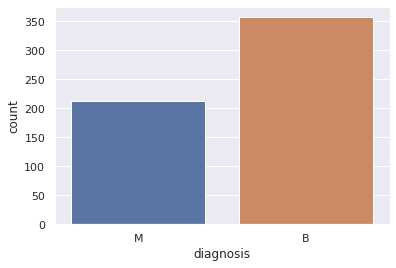

<Figure size 1008x1008 with 0 Axes>

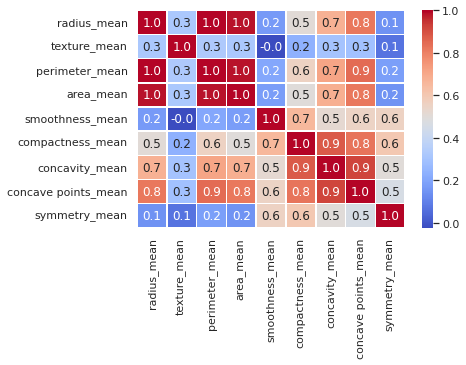

Train Result:

accuracy score: 0.9868

Classification Report: 
               precision    recall  f1-score   support

           B       0.98      1.00      0.99       286
           M       1.00      0.96      0.98       169

    accuracy                           0.99       455
   macro avg       0.99      0.98      0.99       455
weighted avg       0.99      0.99      0.99       455


Confusion Matrix: 
 [[286   0]
 [  6 163]]

Average Accuracy: 	 0.9714
Accuracy SD: 		 0.0299
Test Result:

accuracy score: 0.9737

Classification Report: 
               precision    recall  f1-score   support

           B       0.97      0.99      0.98        71
           M       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


Confusion Matrix: 
 [[70  1]
 [ 2 41]]



In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
#%matplotlib inline

df = pd.read_csv("breast_cancer.csv")
y = df.diagnosis
list = ['Unnamed: 32','id','diagnosis']
X = df.drop(list,axis=1) # drop unnamed: 32 column

sns.countplot(df['diagnosis'],label='Count')

B,M = y.value_counts()
print('Number of Benign:',B)
print('Number of Malignant:',M)

corr = df[df.columns[1:11]].corr()
plt.figure(figsize=(14,14))
plt.show()
sns.heatmap(corr,cbar ='True',annot=True,linewidths=.5,fmt='.1f',cmap='coolwarm')

X = StandardScaler().fit_transform(X.values)
X_train, X_test, y_train, y_test = train_test_split(X, y,
train_size=0.8,
random_state=42)
model = SVC()
model.fit(X_train,y_train)

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        print("Train Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, clf.predict(X_train))))
        print("Classification Report: \n {}\n".format(classification_report(y_train,
clf.predict(X_train))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, clf.predict(X_train))))
        res = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))
    elif train==False:
        print("Test Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, clf.predict(X_test))))
        print("Classification Report: \n {}\n".format(classification_report(y_test, clf.predict(X_test))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, clf.predict(X_test))))
plt.show(model)
print_score(model, X_train, y_train, X_test, y_test, train=True)
print_score(model, X_train, y_train, X_test, y_test, train=False)

Accuracy Score for Testing Dataset: 0.9210526315789473
            Predicted_cancer  Predicted_healthy
Has_cancer                36                  2
Is_healthy                 7                 69 

              precision    recall  f1-score   support

           0       0.97      0.91      0.94        76
           1       0.84      0.95      0.89        38

    accuracy                           0.92       114
   macro avg       0.90      0.93      0.91       114
weighted avg       0.93      0.92      0.92       114



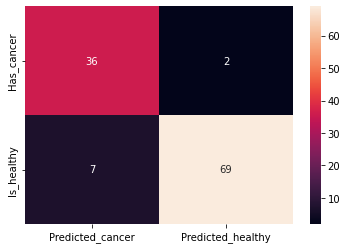

In [ ]:
data = pd.read_csv('breast_cancer.csv')
data = data.sample(frac=1)
dataset = np.array(data)

X = dataset[:,2:32]
Y = dataset[:,1]


from sklearn import preprocessing
le = preprocessing.LabelEncoder()
Y = le.fit_transform(Y)

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Fittng Decision tree classification to training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = "entropy")
classifier.fit(X_train, Y_train)

#Predicting the test set results
y_predict = classifier.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test,y_predict)
print("Accuracy Score for Testing Dataset:", accuracy)

from sklearn.metrics import confusion_matrix, classification_report

cm = np.array(confusion_matrix(Y_test,y_predict, labels = [1,0]))
confusion = pd.DataFrame(cm, index = ['Has_cancer','Is_healthy'],
columns=['Predicted_cancer','Predicted_healthy'])

print(confusion , "\n")
print(classification_report(Y_test, y_predict))

import seaborn as sns
sns.heatmap(confusion,cbar = True, annot = True)